In [26]:
result_path = 'experiment/RED-DiffEq_example_output/CF.npy/0_results.pkl'
gt_path = 'dataset/Test_Data/Velocity_Data_Test/CF.npy'


In [27]:
import numpy as np
import pickle
import src.utils.data_trans as data_trans
with open(result_path, 'rb') as f:
    results = pickle.load(f)
    print(results.keys())
    mu = data_trans.v_denormalize(results['mu'][0,0,1:-1,1:-1])
    final_results = results['final_results']
    ssim = final_results['ssim']
    mae = final_results['mae']
    rmse = final_results['rmse']
    total_loss = final_results['total_losses']
    obs_loss = final_results['obs_losses']
    reg_loss = final_results['reg_losses']
ground_truth = np.load(gt_path)[0,0,:,:]

dict_keys(['mu', 'final_results'])


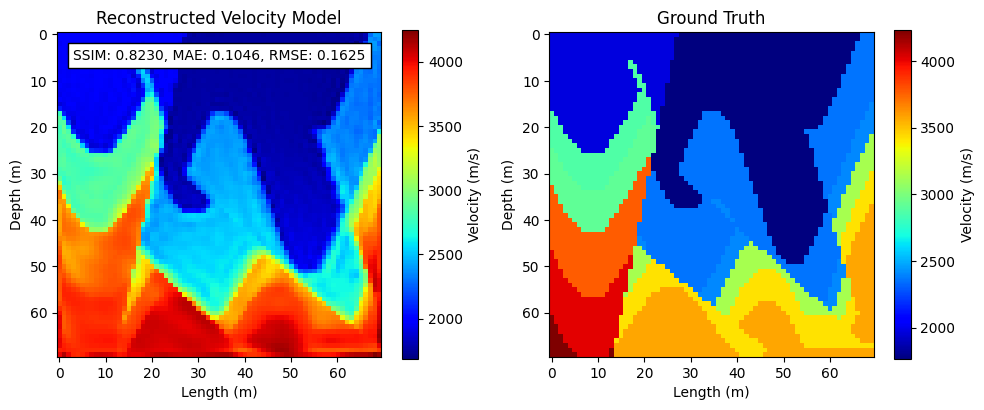

In [38]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Show velocity model
im0 = axs[0].imshow(mu, cmap='jet')
axs[0].text(0.05, 0.95, f'SSIM: {ssim[-1]:.4f}, MAE: {mae[-1]:.4f}, RMSE: {rmse[-1]:.4f}',
            ha='left', va='top', transform=axs[0].transAxes, color='black',
            bbox=dict(facecolor='white', alpha=1))
axs[0].set_title('Reconstructed Velocity Model')
axs[0].set_xlabel('Length (m)')
axs[0].set_ylabel('Depth (m)')

# Show ground truth
im1 = axs[1].imshow(ground_truth, cmap='jet')
axs[1].set_title('Ground Truth')
axs[1].set_xlabel('Length (m)')
axs[1].set_ylabel('Depth (m)')

# Add colorbars for each subplot
fig.colorbar(im0, ax=axs[0], label='Velocity (m/s)', shrink=0.7)
fig.colorbar(im1, ax=axs[1], label='Velocity (m/s)', shrink=0.7)

plt.tight_layout()
plt.show()
